# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
        две модели группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
        AdaBoost;
        градиентный бустинг.
5. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.


In [32]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight

In [33]:
cancer = load_breast_cancer()

In [34]:
# data = pd.read_csv('winequality-red.csv')
# data
data = pd.DataFrame(data = cancer.data,
                       columns = cancer.feature_names) 
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
data.shape

(569, 30)

In [36]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [37]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
data["target"] = cancer.target
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


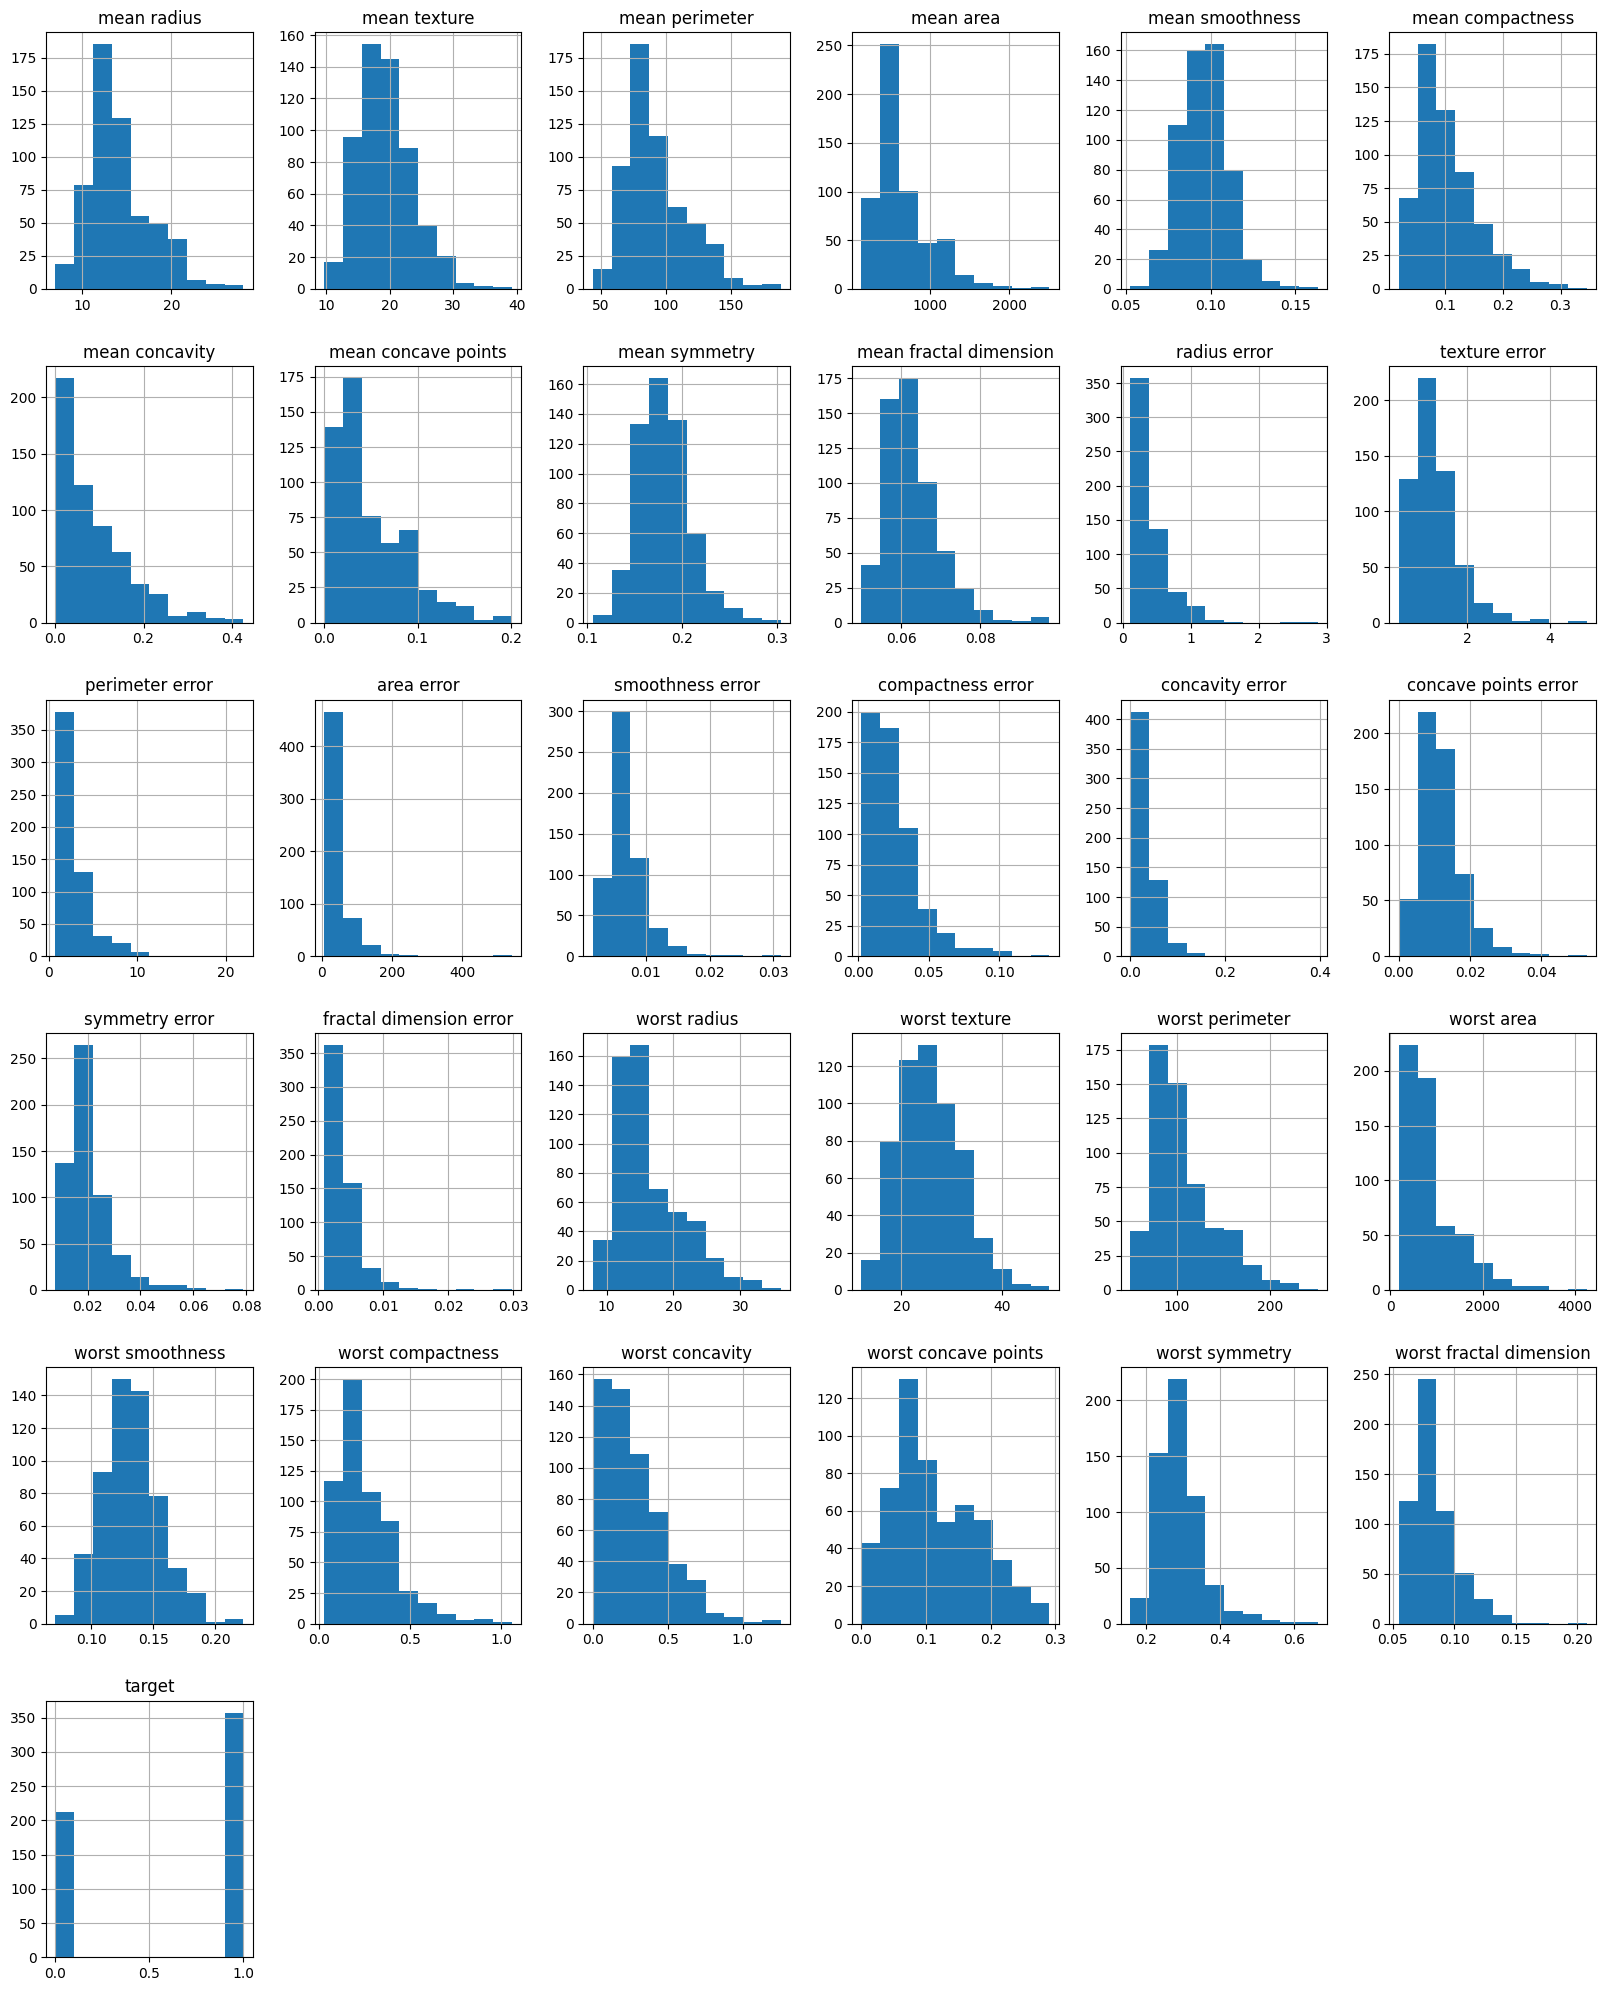

In [39]:
data.hist(figsize=(20,25))
plt.show()

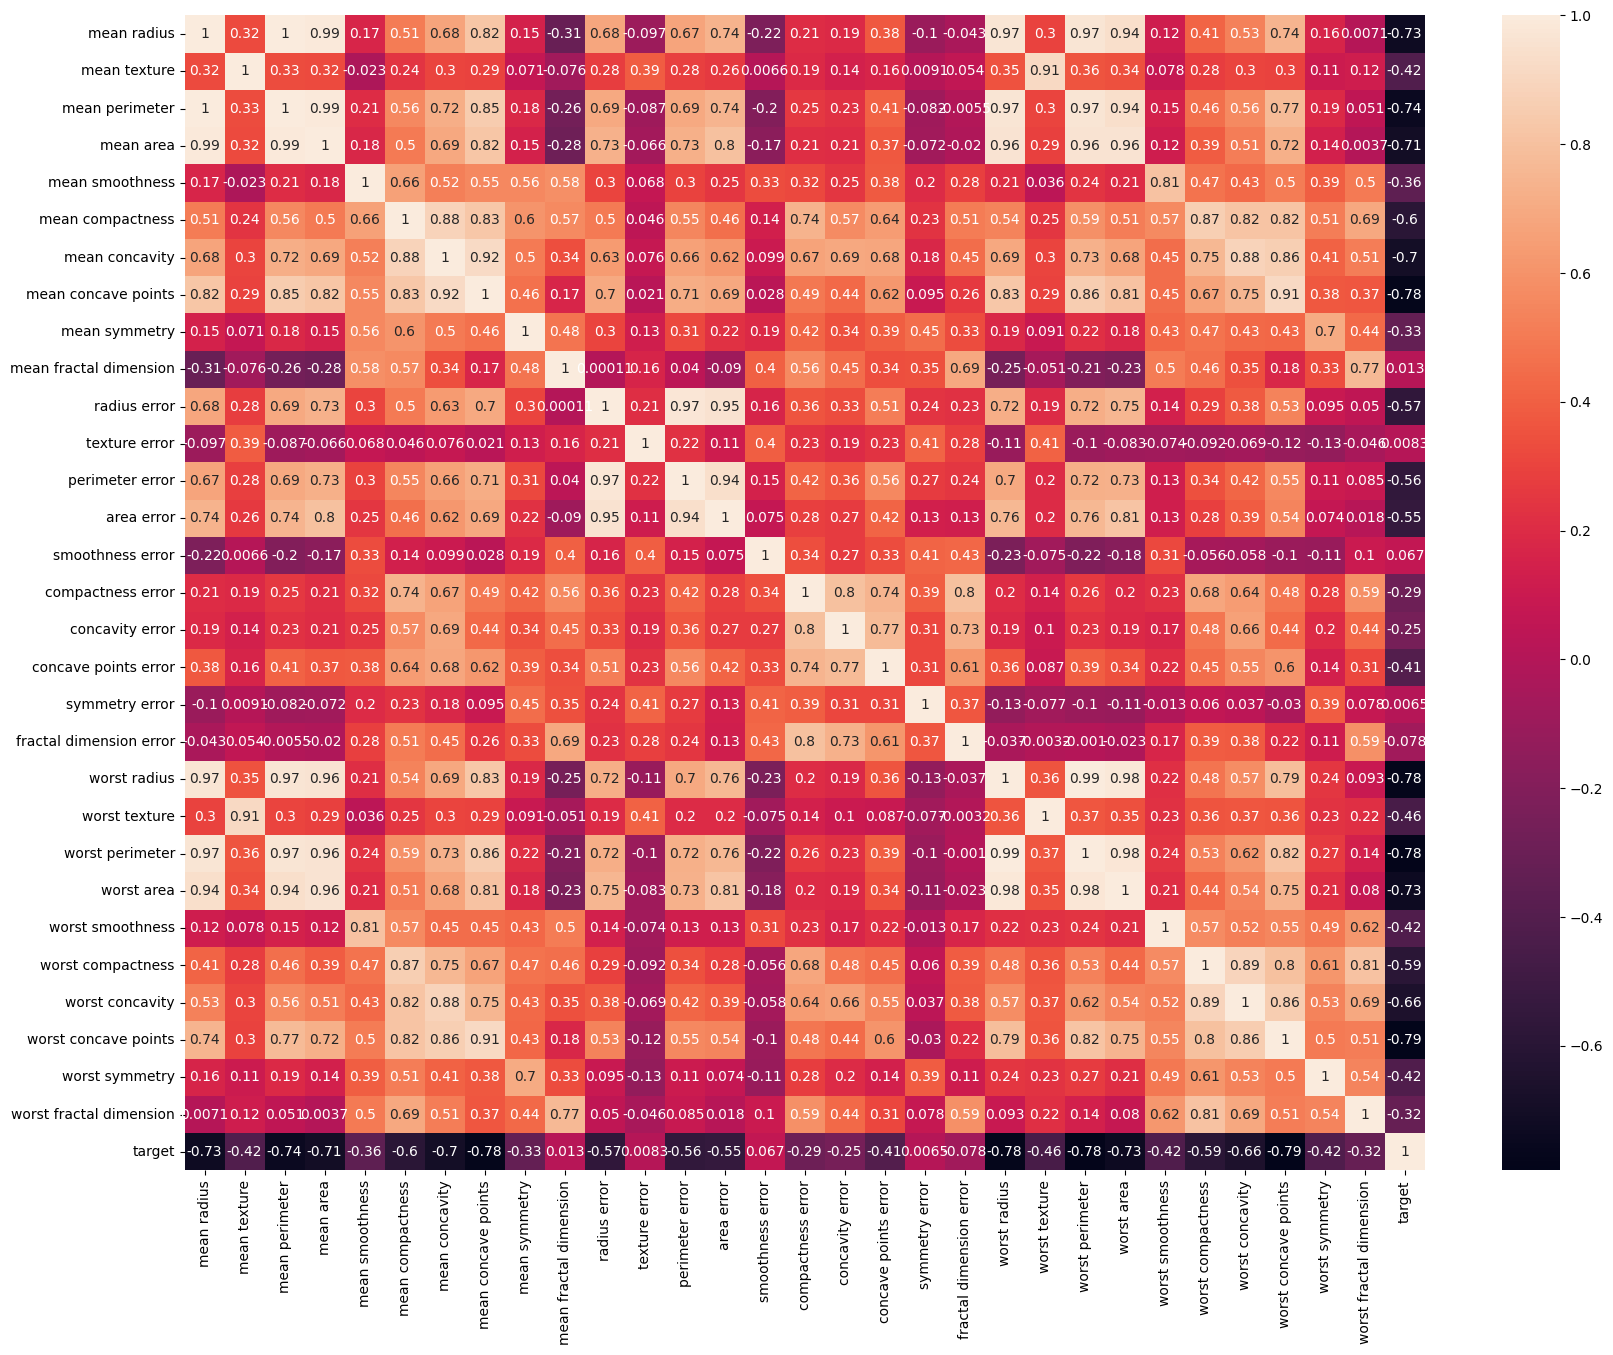

In [40]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(data.corr(),annot=True)
plt.show()

In [41]:
corr_matrix = data.corr().abs()
# Верхний треугольник матрицы, чтобы не учитывать дубли
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

data= data.drop(columns=to_drop)
data

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.02454,0.01114,0.2060,0
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01678,0.01898,0.2572,0
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01557,0.01318,0.2218,0
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.01664,0.02324,0.4087,0


In [42]:
target_corr = data.corr()['target'].abs()  
to_drop = target_corr[target_corr < 0.1].index
data = data.drop(columns=to_drop)
data

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,radius error,compactness error,concave points error,worst symmetry,target
0,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.04904,0.01587,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.01308,0.01340,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.04006,0.02058,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.4956,0.07458,0.01867,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.02461,0.01885,0.2364,0
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,1.1760,0.02891,0.02454,0.2060,0
565,20.13,28.25,0.09780,0.10340,0.1752,0.7655,0.02423,0.01678,0.2572,0
566,16.60,28.08,0.08455,0.10230,0.1590,0.4564,0.03731,0.01557,0.2218,0
567,20.60,29.33,0.11780,0.27700,0.2397,0.7260,0.06158,0.01664,0.4087,0


In [43]:
scaler = MinMaxScaler()

scaler.fit(data.drop('target', axis=1))
scaled_features = scaler.transform(data.drop('target',
                                           axis=1))
 
df_feat = pd.DataFrame(scaled_features,
                       columns=data.columns[:-1])
df_feat.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,radius error,compactness error,concave points error,worst symmetry
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.356147,0.351398,0.300625,0.598462
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.156437,0.081323,0.253836,0.233590
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.229622,0.283955,0.389847,0.403706
3,0.210090,0.360839,0.811321,0.811361,0.776263,0.139091,0.543215,0.353665,1.000000
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.233822,0.167918,0.357075,0.157500


In [44]:
df_feat.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,radius error,compactness error,concave points error,worst symmetry
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.394785,0.260601,0.379605,0.106345,0.174439,0.223454,0.263307
std,0.166787,0.145453,0.126967,0.161992,0.138456,0.100421,0.134498,0.116884,0.121954
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.304595,0.139685,0.282323,0.043781,0.081323,0.144686,0.185098
50%,0.302381,0.308759,0.390358,0.224679,0.369697,0.077023,0.136675,0.207047,0.247782
75%,0.416442,0.408860,0.475490,0.340531,0.453030,0.133044,0.226800,0.278651,0.318155
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X = df_feat
X.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,radius error,compactness error,concave points error,worst symmetry
0,0.521037,0.022658,0.593753,0.792037,0.686364,0.356147,0.351398,0.300625,0.598462
1,0.643144,0.272574,0.289880,0.181768,0.379798,0.156437,0.081323,0.253836,0.233590
2,0.601496,0.390260,0.514309,0.431017,0.509596,0.229622,0.283955,0.389847,0.403706
3,0.210090,0.360839,0.811321,0.811361,0.776263,0.139091,0.543215,0.353665,1.000000
4,0.629893,0.156578,0.430351,0.347893,0.378283,0.233822,0.167918,0.357075,0.157500


In [46]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [47]:
y.unique()

array([0, 1])

In [48]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

# train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# Ансамбли моделей
## Бэггинг

In [77]:
model = BaggingClassifier(
    estimator=SVC(class_weight='balanced', random_state=42),
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

classifiers = model.fit(X_train, y_train)

## Случайный лес

In [71]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

## AdaBoost

In [67]:
base_estimator = DecisionTreeClassifier(
    max_depth=1,
    class_weight='balanced'
)

clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    random_state=0
)
clf.fit(X, y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1),
                   random_state=0)

## Градиентный бустинг

In [52]:
# grad = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
grad = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,              
    random_state=0
).fit(X_train, y_train, sample_weight=sample_weights)

# Оценка моделей

In [53]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [78]:
bag_pred = model.predict(X_test)

In [72]:
clf_rf_pred = clf_rf.predict(X_test)

In [68]:
ada_boost_pred = clf.predict(X_test)

In [56]:
grad_boost_pred = grad.predict(X_test)

In [79]:
print(f"Бэггинг f1: {f1_score(bag_pred, y_test, average='weighted')}, accuracy: {accuracy_score(bag_pred, y_test)}")

Бэггинг f1: 0.9197006221951197, accuracy: 0.9202127659574468


In [73]:
print(f"RanForrest f1: {f1_score(clf_rf_pred, y_test, average='weighted')}, accuracy: {accuracy_score(clf_rf_pred, y_test)}")

RanForrest f1: 0.9370580587880902, accuracy: 0.9361702127659575


In [69]:
print(f"AdaBoost f1: {f1_score(ada_boost_pred, y_test, average='weighted')}, accuracy: {accuracy_score(ada_boost_pred, y_test)}")

AdaBoost f1: 0.9573289893937182, accuracy: 0.9574468085106383


In [59]:
print(f"Градиентный бустинг f1: {f1_score(grad_boost_pred, y_test, average='weighted')}, accuracy: {accuracy_score(grad_boost_pred, y_test)}")

Градиентный бустинг f1: 0.9356912042375781, accuracy: 0.9361702127659575


In [80]:
print(classification_report(bag_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        75
           1       0.92      0.96      0.94       113

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.92       188
weighted avg       0.92      0.92      0.92       188



In [74]:
print(classification_report(clf_rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.98      0.92      0.95       126

    accuracy                           0.94       188
   macro avg       0.92      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188



In [70]:
print(classification_report(ada_boost_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.96      0.97      0.97       116

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



In [62]:
print(classification_report(grad_boost_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        76
           1       0.92      0.97      0.95       112

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188

